In [1]:
from data_management import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.ext.matproj import MPRester
from tqdm import tqdm
import pickle
from ase import Atoms
import numpy as np
from functools import reduce
from aiida_utils.load_data import load_data_slim


/usr/local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_slim = load_data_slim()
data_slim['target'] = None

In [3]:
a=Atoms("Li48P8S40I8")
elements, counts = np.unique(a.symbols, return_counts=True)
divisor = reduce(np.gcd, counts)
for e, c in zip(elements, counts // divisor): print(f"{e}{c}")
for e, c in zip(elements, counts // divisor): print(f"{e}{c if c > 1 else ''}")

a=Atoms("Li48P8S40I8")
elements, counts = np.unique(a.symbols, return_counts=True)
tuple(sorted([f"{e}{c if c > 1 else ''}" for e, c in zip(elements, counts // divisor)]))


I1
Li6
P1
S5
I
Li6
P
S5


('I', 'Li6', 'P', 'S5')

In [4]:
group_A = [
'Li20Ge2P4S24',
'Li8Ga8Br24',
'Li40Cl24O8',
'Li8Cs4I12',
'Li7TaO6',
'Li4Ga4I16'
]


group_B_structures = [
"Li4Re6S11",
"Li6P1S5I1",
"Li2B2S5",
"Li1Ta1Ge1O5",
"Li2S2O7",
"Li1I1O3",
"Li1Al1Si1O4",
"Li5B1S4O16",
"Li2Mg2S3O12",
"Li1Ti1P1O5",
"Li3Cs1Cl4",
"Li6Y(BO3)3",
"Li2Zn1Sn1Se4",
"Li2Ti3O7",
"Rb1Li7Si2O8",
"Li3Ga1F6",
"Li2In2Ge1S6",
"Li1Mo1As1O6",
"Li9Ga3P8O29"
]


group_B_supercells = [
"Li16Re24S44",
"Li48P8S40I8",
"Li8B8S20",
"Li4Ta4Ge4O20",
"Li16S16O56",
"Li16I16O48",
"Li12Al12Si12O48",
"Li20B4S16O64",
"Li8Mg8S12O48",
"Li16Ti16P16O80",
"Li24Cs8Cl32",
"Li24Y4B12O36",
"Li16Zn8Sn8Se32",
"Li8Ti12O28",
"Rb4Li28Si8O32",
"Li18Ga6F36",
"Li16In16Ge8",
"Li8Mo8As8O48",
"Li18Ga6P16O58"

]


B_ids = [
    1008693, 421083, 1510745, 280992, 188009, 20032, 9000368,
    428002, 2020217, 39761, 245975, 1510933, 7035178, 193803,
    33864, 8101456, 4329224, 2014117, 2208797
]

group_C_structures = [
"Li2Ce1N2",
"Li6Sr3Ta2O11",
"Li5Re1N4",
"Li6Zn1O4",
"Li4K1Al1O4",
"Li2Al1B5O10",
"Li2Cs3Br5",
"Na1Li2B1P2O8",
"Li1La1C2O6",
"Li1Au1F4",
"Li1Si2B1O6",
"Li2Cd1P4O12",
"Li2Si3O7",
"Li2Te1O3",
"Li3Au1O3",
"Sr1Li2Si2N4",
"Li1Y1Mo3O8",
"Li2Mo1O4",
"Li2Pd1O2",
"Li3Sc1B2O6",
"Li1Nb3In1Cl9",
"Li6W1N4",
"Li1Zn1As1O4",
"Li4Ta1N3",
"Li3Sc1N2",
"Li3Al1Mo2As2O14",
"Li1P1O3",
"Li7P1N4",
"Li1Y1Si1O4",
"Li2Si2O5",
"Li16Nb2N8O1",
"Li9Mg3P4O16F3",
"Li8Pt1O6",
"Li3Ga1B2O6",
"Li3Al1Si1O5",
"Li8Be5B6O18",
"Li4K1Nb1O5",
"Li4Te1O5",
"Li4Ge5O12",
"Li7Nb1N4",
"Li3Al1N2",
"Li3Ga1B2O6",
"Li2Al1B1O4",
"Li4Zn1P2O8",
"K1Li1Zn1O2",
"Li6Te1O6",
"Li2W1O4",
"Sr1Li4P2",
"Li3B7O12",
"Sr1Li2Ta2O7",
"Cs2Li3B5O10",
"Li3Ba2Ta1N4",
"Li2Si2O5",
"Li6Be3B4O12",
"Li1In1Ge1O4",
"Cs2Li2B2P4O15",
"Li2Te1W1O6",
"Li4Al3Ge3Br1O12",
"Li2Mo4O13",
"Li2Ta2O3F6",
"Li2Mg1Si1O4",
"Li3Ba2Nb1N4",
"Rb2Li3B1P4O14",
"Li6Zr1Be1F12",
"Li1B1O2",
"Li2B3P1O8",
"Li3Al1B2O6",
"Li1Re1O4",
"K1Li1Y1F5",
"Li1Nb1O3"
]

group_C_supercells = [
"Li16Ce8N16",
"Li24Sr12Ta8O44",
"Li20Re4N16",
"Li24Zn4O16",
"Li64K16Al16O64",
"Li8Al4B20O40",
"Li8Cs12Br20",
"Na4Li8B4P8O32",
"Li4La4C8O24",
"Li16Au16F64",
"Li16Si32B16O96",
"Li8Cd4P16O48",
"Li16Si24O56",
"Li32Te16O48",
"Li36Au12O36",
"Sr12Li24Si24N48",
"Li3Y3Mo9O24",
"Li12Mo6O24",
"Li24Pd12O24",
"Li24Sc8B16O48",
"Li2Nb6In2Cl18",
"Li24W4N16",
"Li6Zn6As6O24",
"Li32Ta8N24",
"Li24Sc8N16",
"Li9Al3Mo6As6O42",
"Li24P24O72",
"Li56P8N32",
"Li8Y8Si8O32",
"Li16Si16O40",
"Li64Nb8N32O4",
"Li36Mg12P16O64F12",
"Li32Pt4O24",
"Li24Ga8B16O48",
"Li48Al16Si16O80",
"Li32Be20B24O72",
"Li32K8Nb8O40",
"Li16Te4O20",
"Li16Ge20O48",
"Li56Nb8N32",
"Li24Al8N16",
"Li24Ga8B16O48",
"Li32Al16B16O64",
"Li16Zn4P8O32",
"K6Li6Zn6O12",
"Li48Te8O48",
"Li12W6O24",
"Sr4Li16P8",
"Li12B28O48",
"Sr4Li8Ta8O28",
"Cs8Li12B20O40",
"Li24Ba16Ta8N32",
"Li32Si32O80",
"Li24Be12B16O48",
"Li16In16Ge16O64",
"Cs8Li8B8P16O60",
"Li16Te8W8O48",
"Li8Al6Ge6Br2O24",
"Li6Mo12O39",
"Li24Ta24O36F72",
"Li16Mg8Si8O32",
"Li24Ba16Nb8N32",
"Rb8Li12B4P16O56",
"Li24Zr4Be4F48",
"Li32B32O64",
"Li16B24P8O64",
"Li24Al8B16O48",
"Li12Re12O48",
"K16Li16Y16F80",
"Li16Nb16O48"
]


C_ids = [
    34003, 4306193, 92468, 62137, 65260, 2012178, 245978, 291512, 174533,
    1510140, 1511474, 1008009, 1501470, 4317, 1510224, 4002768, 28526,
    7024042, 61199, 2218562, 75071, 153620, 86184, 1535987, 1532734,
    2220995, 9014879, 642182, 34079, 2003027, 174443, 426103, 61218,
    1511740, 7224138, 4337787, 73124, 1530934, 9007843, 2000944, 1537475,
    2242045, 50612, 1544389, 49022, 40247, 67236, 416888, 9007831, 246277,
    7213712, 75031, 69300, 4337786, 167518, 424281, 4330276, 87991, 4155, 405777, 
    7222190, 75516, 424352, 1528861, 2310701, 7031897, 1100060, 1535227, 187751, 182033
]


group_D_structures = [
"Li4Mo3O8",
"Li1Ta1Si1O5",
"Li2P2Pd1O7",
"Na1Li2P1O4",
"Ba1Na1Li3B6O12",
"Na1Li1B4O7",
"Na1Li2B1O3",
"Li1Au1S4O14",
"Li10B14Cl2O25",
"Li1Au1I4",
"Li5La3Nb2O12",
"Li1Zr2As3O12",
"Li1Al1Ge1O5",
"Li3Sc1F6",
"Li1Nb3Cl8"
]


group_D_supercells = [
"Li24Mo18O48",
"Li4Ta4Si4O20",
"Li8P8Pd4O28",
"Na8Li16P8O32",
"Ba2Na2Li6B12O24",
"Na4Li4B16O28",
"Na16Li32B16O48",
"Li4Au4S16O56",
"Li10B14Cl2O25",
"Li8Au8I32",
"Li20La12Nb8O48",
"Li2Zr4As6O24",
"Li8Al8Ge8O40",
"Li18Sc6F36",
"Li4Nb12Cl32"]


D_ids = [
    84602, 1534486, 1000333, 9004248, 423774, 416956, 1511223, 4326716,
    1530960, 1510187, 68251, 190656, 1526845, 1535801, 50232
]

group_E_structures = [
"Li1Ga1Cl3",
"Li1Ga1Br4",
"Li6Mg1Br8",
"Li3P7",
"Li3As1S3",
"Li1B1S4Cl4O12",
"Li1Sn2P3O12",
"Li4Ge9O20",
"Li1I1O4",
"Rb2Li1Ta1S4",
"Li1P7",
"Li4P2O7",
"Li2Ge4O9",
"Li1Au1F4",
"Li2Se1O4",
"Li1Al1Se2",
"Li1In1P2O7",
"Li4Ti1O4",
"Li6Si2O7",
"Li2In2Si1Se6",
"Li1B1S2O8"
]

group_E_supercells = [
"Li16Ga16Cl48",
"Li16Ga16Br64",
"Li12Mg2Br16",
"Li12P28",
"Li12As4S12",
"Li4B4S16Cl16O48",
"Li2Sn4P6O24",
"Li4Ge9O20",
"Li8I8O32",
"Rb8Li4Ta4S16",
"Li8P56",
"Li16P8O28",
"Li16Ge32O72",
"Li8Au8F32",
"Li12Se6O24",
"Li16Al16Se32",
"Li4In4P8O28",
"Li24Ti6O24",
"Li24Si8O28",
"Li16In16Si8Se48",
"Li8B8S16O64"
]

E_ids = [
    1530096, 61337, 73275, 60774, 2007413, 1004054, 83831, 34361,
    1536985, 1535645, 23621, 2005920, 2019177, 33953, 67234, 4321118,
    60935, 75164, 1539516, 4329225, 425174
]

In [5]:
def t_elements(label):
    a=Atoms(label)
    elements, counts = np.unique(a.symbols, return_counts=True)
    divisor = reduce(np.gcd, counts)
    return tuple(sorted([f"{e}{c if c > 1 else ''}" for e, c in zip(elements, counts // divisor)]))

data_slim['t_elements'] = data_slim.apply(lambda row: t_elements(row['stru_label']),axis=1)


In [6]:
def match_id_and_target(data_slim, ids, name_of_group):
    cnt = 0
    for id in ids:
        if len(data_slim[(data_slim['stru_id'] == id) & (data_slim['target'] == 'group_A')]) != 0:
            print(data_slim[(data_slim['stru_id'] == id) & (data_slim['target'] == 'group_A')])
        data_slim.loc[data_slim['stru_id'] == id, 'target'] = name_of_group
        cnt += len(data_slim[data_slim['stru_id'] == id])
    print(cnt)

In [7]:
cnt = 0
for gr_A in group_A:
    a=Atoms(gr_A)
    elements, counts = np.unique(a.symbols, return_counts=True)
    divisor = reduce(np.gcd, counts)
    t_elements = tuple(sorted([f"{e}{c if c > 1 else ''}" for e, c in zip(elements, counts // divisor)]))
    data_slim.loc[data_slim['t_elements'] == t_elements, 'target'] = 'group_A'
    cnt += len(data_slim[data_slim['t_elements'] == t_elements])
print(cnt)

28


In [8]:
match_id_and_target(data_slim, B_ids, 'group_B')
match_id_and_target(data_slim, C_ids, 'group_C')
match_id_and_target(data_slim, D_ids, 'group_D')
match_id_and_target(data_slim, E_ids, 'group_E')

76
70
5
21


In [9]:
print(len(data_slim[data_slim['target'] == 'group_A']))
print(len(data_slim[data_slim['target'] == 'group_B']))
print(len(data_slim[data_slim['target'] == 'group_C']))
print(len(data_slim[data_slim['target'] == 'group_D']))
print(len(data_slim[data_slim['target'] == 'group_E']))

28
76
70
5
21


In [10]:
print(len(data_slim[data_slim['target'].isna()]))

0


In [11]:
cnt_supercell = 0
cnt_structure = 0
for gr_D_supercell, group_D_structure in zip(group_D_supercells, group_D_structures):
    a=Atoms(gr_D_supercell)
    elements, counts = np.unique(a.symbols, return_counts=True)
    divisor = reduce(np.gcd, counts)
    t_elements = tuple(sorted([f"{e}{c if c > 1 else ''}" for e, c in zip(elements, counts // divisor)]))
    data_slim.loc[data_slim['t_elements'] == t_elements, 'target'] = 'group_D'
    cnt_supercell += len(data_slim[data_slim['t_elements'] == t_elements])
    a=Atoms(group_D_structure)
    elements, counts = np.unique(a.symbols, return_counts=True)
    divisor = reduce(np.gcd, counts)
    t_elements = tuple(sorted([f"{e}{c if c > 1 else ''}" for e, c in zip(elements, counts // divisor)]))
    data_slim.loc[data_slim['t_elements'] == t_elements, 'target'] = 'group_D'
    cnt_structure += len(data_slim[data_slim['t_elements'] == t_elements])
print(cnt_supercell)
print(cnt_structure)

5
5


In [12]:
cnt_supercell = 0
cnt_structure = 0
i = 0
for gr_D_supercell, group_D_structure in zip(group_D_supercells, group_D_structures):
    a=Atoms(gr_D_supercell)
    elements, counts = np.unique(a.symbols, return_counts=True)
    divisor = reduce(np.gcd, counts)
    t_elements = tuple(sorted([f"{e}{c if c > 1 else ''}" for e, c in zip(elements, counts // divisor)]))
    data_slim.loc[data_slim['t_elements'] == t_elements, 'target'] = 'group_D'
    add_supercell = len(data_slim[data_slim['t_elements'] == t_elements])
    a=Atoms(group_D_structure)
    elements, counts = np.unique(a.symbols, return_counts=True)
    divisor = reduce(np.gcd, counts)
    t_elements = tuple(sorted([f"{e}{c if c > 1 else ''}" for e, c in zip(elements, counts // divisor)]))
    data_slim.loc[data_slim['t_elements'] == t_elements, 'target'] = 'group_D'
    add_structure = len(data_slim[data_slim['t_elements'] == t_elements])
    cnt_supercell += add_supercell
    cnt_structure += add_structure
    if add_supercell == 0 and add_structure == 0:
        print(i, gr_D_supercell)
    i += 1

0 Li24Mo18O48
1 Li4Ta4Si4O20
2 Li8P8Pd4O28
3 Na8Li16P8O32
4 Ba2Na2Li6B12O24
6 Na16Li32B16O48
7 Li4Au4S16O56
9 Li8Au8I32
13 Li18Sc6F36
14 Li4Nb12Cl32


In [13]:
data_slim.drop_duplicates(subset=['stru_id', 'stru_label', 'temp'], keep='first', inplace=True, ignore_index=False)
data_slim['diffusion_coef'] = data_slim['diff_mean']
data_slim.loc[data_slim['diff_mean'] <= 1e-15, 'diffusion_coef'] = 1e-15
data_slim = data_slim.drop_duplicates(subset=['stru_id', 'stru_label', 'temp'], keep='first')
data_slim_1000_K = data_slim[data_slim['temp'] == 1000]


In [14]:
data_temp = data_slim[(data_slim['target'] == 'group_B') | (data_slim['target'] == 'group_A')]
data_temp.reset_index(drop = True, inplace = True)
names = data_temp[data_temp['temp'] == 1000]['stru_label'].to_numpy()
indexes = np.argsort(names)

In [15]:
names = data_slim[data_slim['target'] == 'group_A']['stru_label'].to_numpy()

In [16]:
data_slim[data_slim['target'] == 'group_B']['stru_label'].unique()

array(['Li4Ta4Ge4O20', 'Li4B4S10', 'Li8I8O24', 'Li4Ti6O14', 'Li12P2S10I2',
       'Rb2Li14Si4O16', 'Li24Y4B12O36', 'Cs2Li6Cl8', 'Li8Mg8S12O48',
       'Li8S8O28', 'Li4Mo4As4O24', 'Li12Al12Si12O48', 'Li18Ga6F36',
       'Li20B4S16O64', 'Li4Zn2Sn2Se8', 'Li4In4Ge2S12', 'Li18Ga6P16O58',
       'Li4Ti4P4O20', 'Li16Re24S44'], dtype=object)

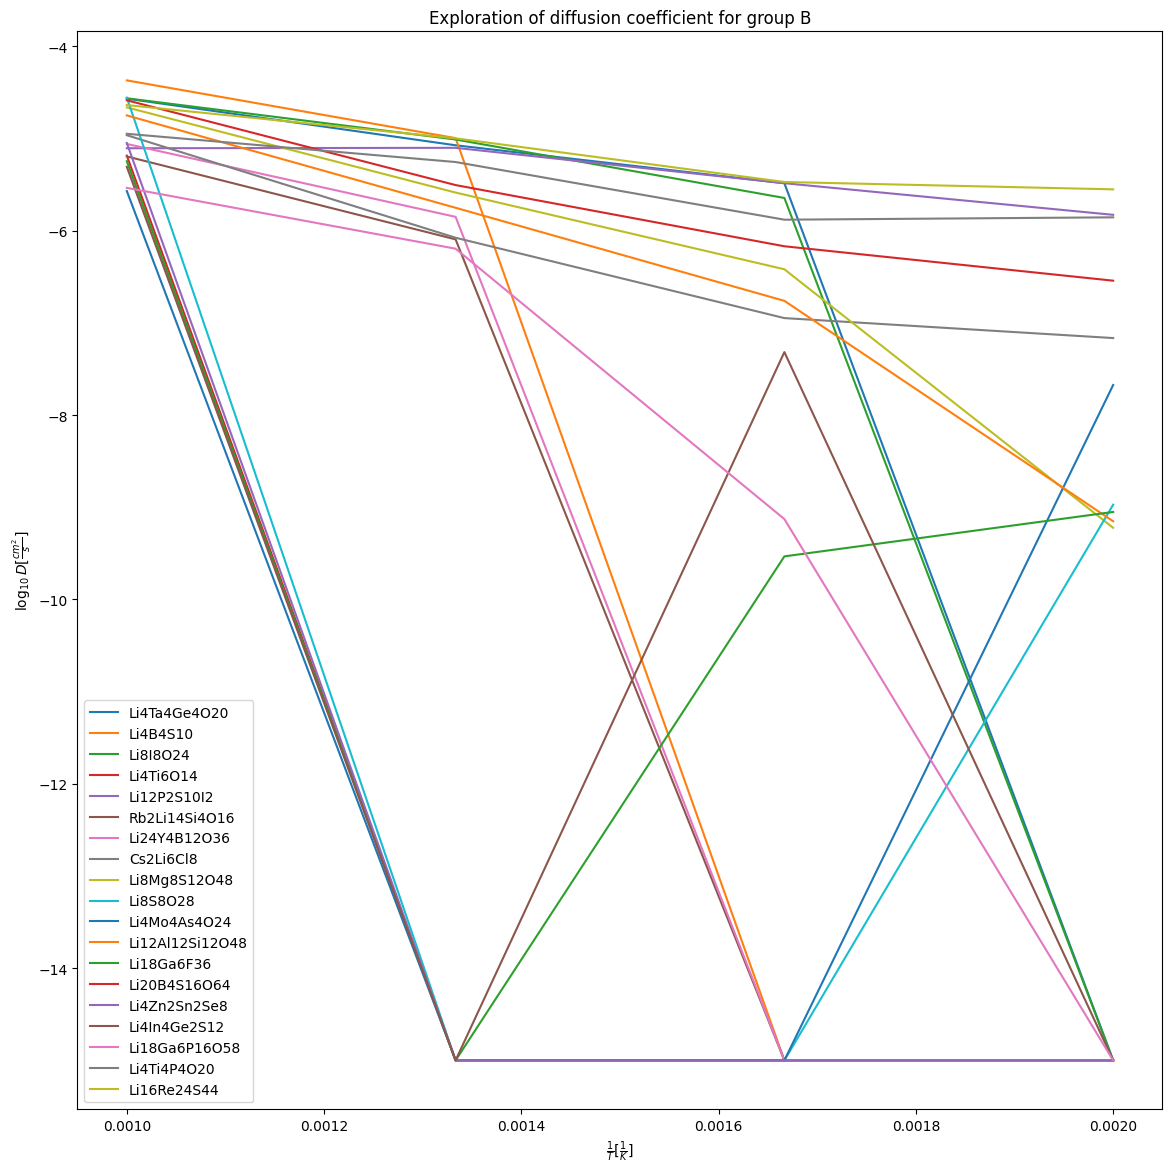

In [17]:
names = data_slim[data_slim['target'] == 'group_B']['stru_label'].unique()
fig, ax = plt.subplots(figsize=(14, 14))
plt.title('Exploration of diffusion coefficient for group B')
temps = [500, 600, 750, 1000]
for name in names:
    data = data_slim[data_slim['stru_label'] == name][['temp', 'diffusion_coef']].sort_values(by='temp')
    plt.plot(1/data['temp'], np.log10(data['diffusion_coef']), label = name)

plt.xlabel('$\\frac{1}{T}[\\frac{1}{K}]$')
plt.ylabel('$\log_{10}D[\\frac{cm^2}{s}]$')
plt.legend()
plt.show()

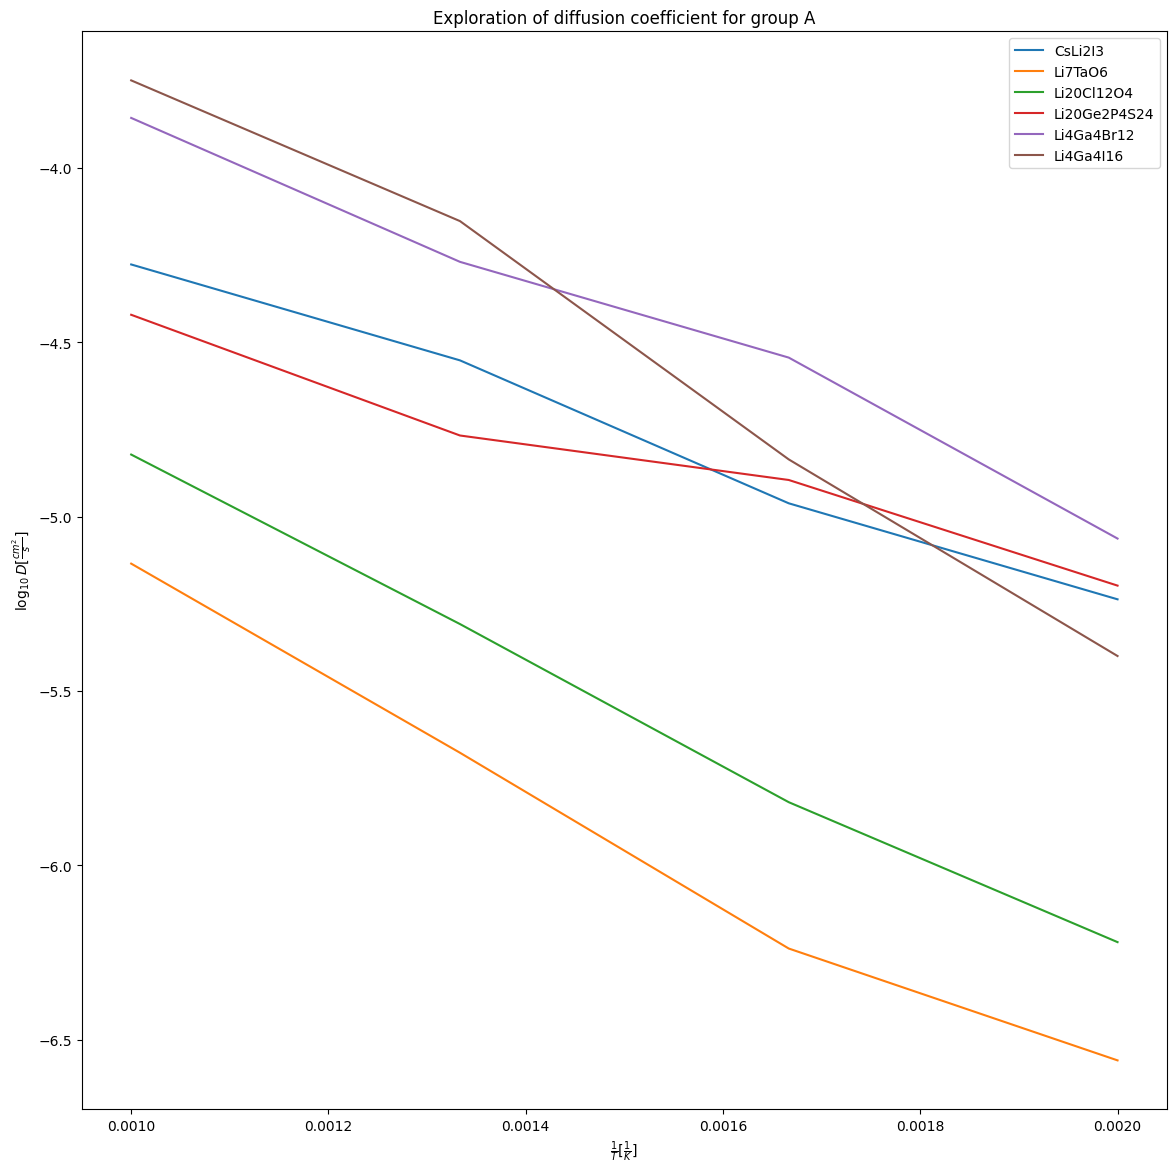

In [18]:
names = data_slim[data_slim['target'] == 'group_A']['stru_label'].unique()
fig, ax = plt.subplots(figsize=(14, 14))
plt.title('Exploration of diffusion coefficient for group A')
temps = [500, 600, 750, 1000]
for name in names:
    data = data_slim[data_slim['stru_label'] == name][['temp', 'diffusion_coef']].sort_values(by='temp')
    plt.plot(1/data['temp'], np.log10(data['diffusion_coef']), label = name)

plt.xlabel('$\\frac{1}{T}[\\frac{1}{K}]$')
plt.ylabel('$\log_{10}D[\\frac{cm^2}{s}]$')
plt.legend()
plt.show()

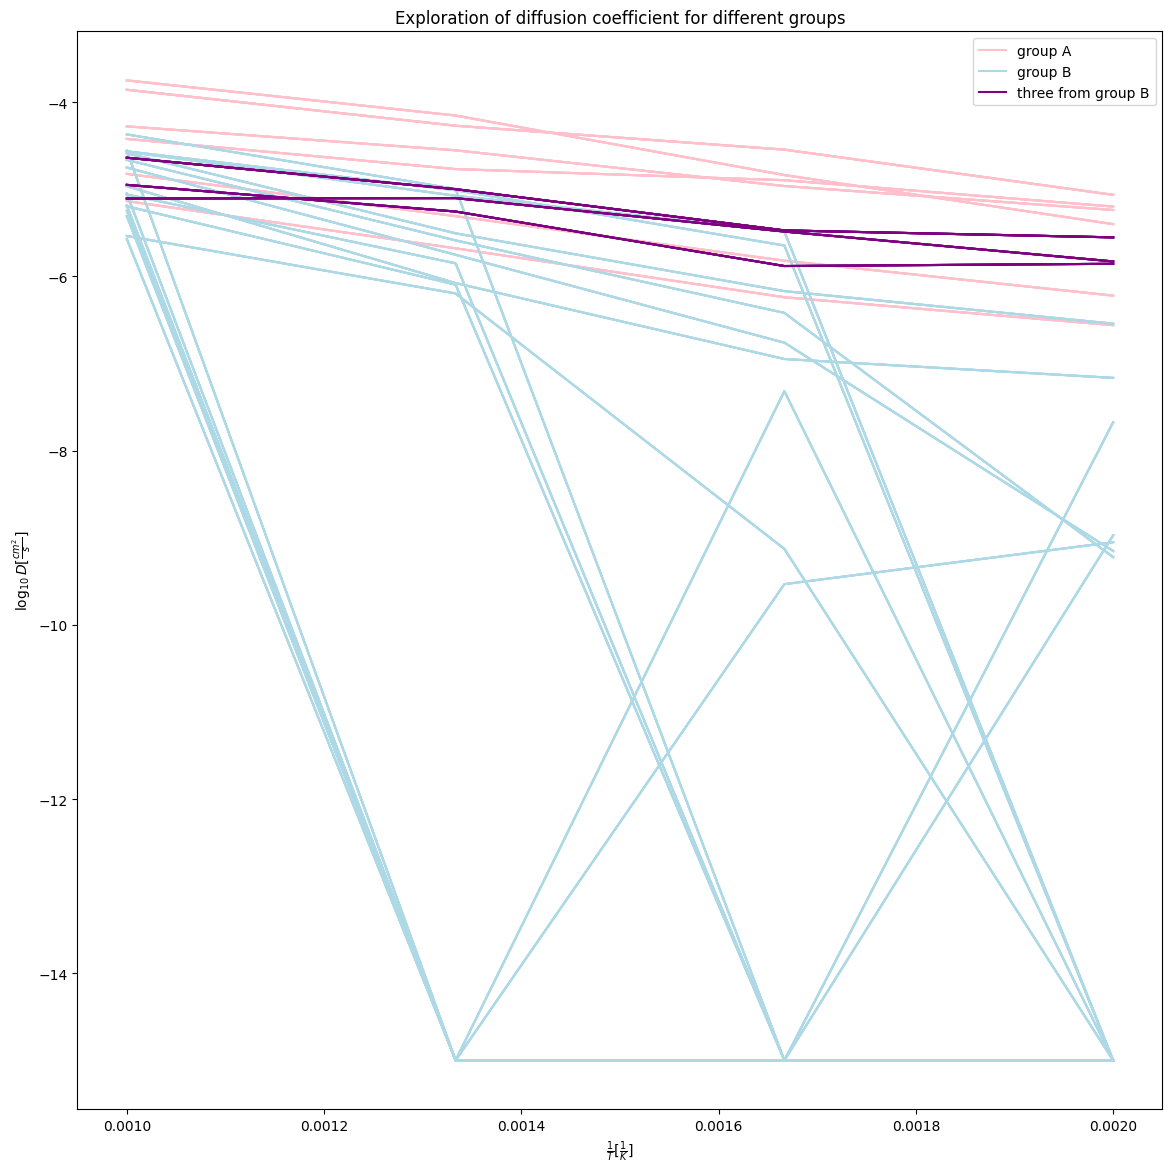

In [19]:
names = data_slim[(data_slim['target'] == 'group_A')]['stru_label'].to_numpy()
fig, ax = plt.subplots(figsize=(14, 14))
plt.title('Exploration of diffusion coefficient for different groups')
temps = [500, 600, 750, 1000]
for name in names:
    data = data_slim[data_slim['stru_label'] == name][['temp', 'diffusion_coef']].sort_values(by='temp')
    plt.plot(1/data['temp'], np.log10(data['diffusion_coef']), c = 'pink')
plt.plot(1/data['temp'], np.log10(data['diffusion_coef']), label = 'group A', c = 'pink')

names = data_slim[(data_slim['target'] == 'group_B')]['stru_label'].to_numpy()
temps = [500, 600, 750, 1000]
for name in names:
    data = data_slim[data_slim['stru_label'] == name][['temp', 'diffusion_coef']].sort_values(by='temp')
    plt.plot(1/data['temp'], np.log10(data['diffusion_coef']), c = 'lightblue')
plt.plot(1/data['temp'], np.log10(data['diffusion_coef']), label = 'group B', c = 'lightblue')


names = data_slim[data_slim['stru_id'].isin([1008693, 39761, 421083]) == True]['stru_label'].to_numpy()
temps = [500, 600, 750, 1000]
for name in names:
    data = data_slim[data_slim['stru_label'] == name][['temp', 'diffusion_coef']].sort_values(by='temp')
    plt.plot(1/data['temp'], np.log10(data['diffusion_coef']), c = 'purple')
plt.plot(1/data['temp'], np.log10(data['diffusion_coef']), label = 'three from group B', c = 'purple')

plt.xlabel('$\\frac{1}{T}[\\frac{1}{K}]$')
plt.ylabel('$\log_{10}D[\\frac{cm^2}{s}]$')
plt.legend()
plt.show()

In [20]:
hand, labl = ax.get_legend_handles_labels()

Number of compounds at group_A is 6
Number of compounds at group_B is 19


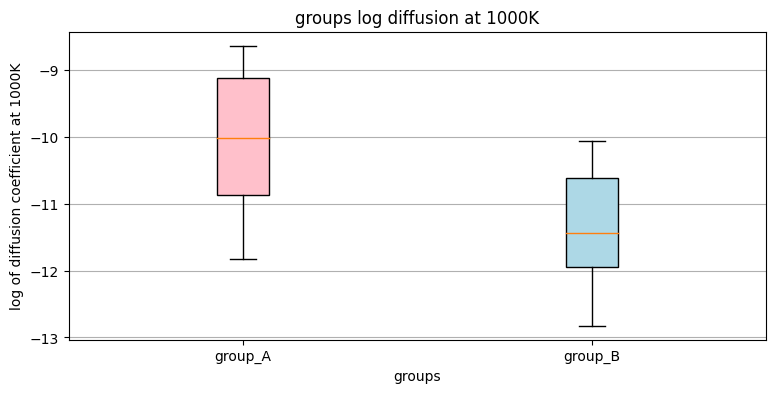

In [21]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

labels = ['group_A', 'group_B']
all_data = list()
data_slim = data_temp[data_temp['temp'] == 1000]
for i, group in enumerate(['group_A', 'group_B']):
    data = data_slim[data_slim['target'] == group]
    print("Number of compounds at {} is {}".format(group, data['diffusion_coef'].shape[0]))
    all_data.append(np.log(data['diffusion_coef']))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('groups log diffusion at 1000K')

# notch shape box plot


# fill with colors
colors = ['pink', 'lightblue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1]:
    ax.yaxis.grid(True)
    ax.set_xlabel('groups')
    ax.set_ylabel('log of diffusion coefficient at 1000K')


Number of compounds at group_A is 6
Number of compounds at group_B is 19


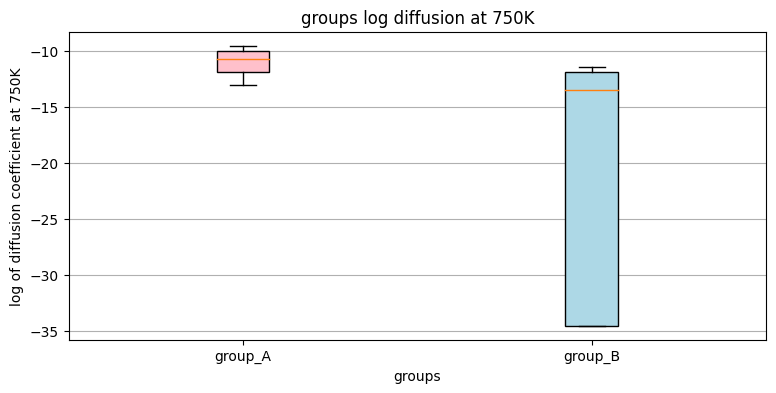

In [22]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

labels = ['group_A', 'group_B']
all_data = list()
data_slim = data_temp[data_temp['temp'] == 750]
for i, group in enumerate(['group_A', 'group_B']):
    data = data_slim[data_slim['target'] == group]
    print("Number of compounds at {} is {}".format(group, data['diffusion_coef'].shape[0]))
    all_data.append(np.log(data['diffusion_coef']))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('groups log diffusion at 750K')

# notch shape box plot


# fill with colors
colors = ['pink', 'lightblue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1]:
    ax.yaxis.grid(True)
    ax.set_xlabel('groups')
    ax.set_ylabel('log of diffusion coefficient at 750K')


Number of compounds at group_A is 6
Number of compounds at group_B is 19


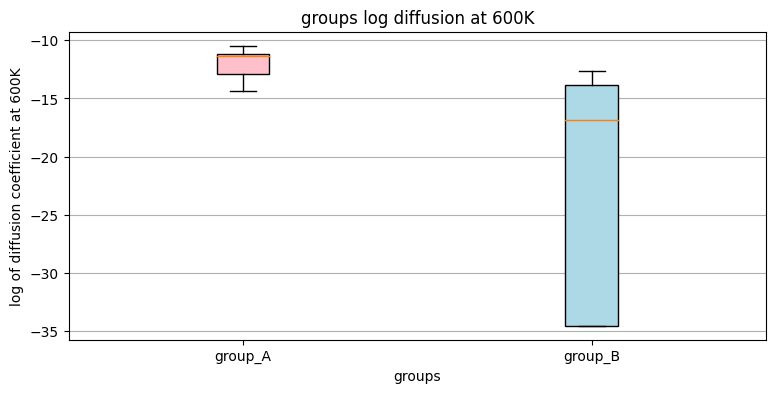

In [23]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

labels = ['group_A', 'group_B']
all_data = list()
data_slim = data_temp[data_temp['temp'] == 600]
for i, group in enumerate(['group_A', 'group_B']):
    data = data_slim[data_slim['target'] == group]
    print("Number of compounds at {} is {}".format(group, data['diffusion_coef'].shape[0]))
    all_data.append(np.log(data['diffusion_coef']))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('groups log diffusion at 600K')

# notch shape box plot


# fill with colors
colors = ['pink', 'lightblue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1]:
    ax.yaxis.grid(True)
    ax.set_xlabel('groups')
    ax.set_ylabel('log of diffusion coefficient at 600K')


Number of compounds at group_A is 6
Number of compounds at group_B is 19


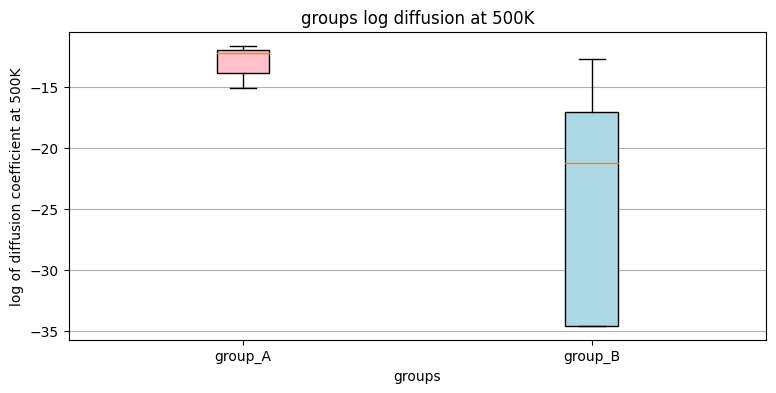

In [24]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

labels = ['group_A', 'group_B']
all_data = list()
data_slim = data_temp[data_temp['temp'] == 500]
for i, group in enumerate(['group_A', 'group_B']):
    data = data_slim[data_slim['target'] == group]
    print("Number of compounds at {} is {}".format(group, data['diffusion_coef'].shape[0]))
    all_data.append(np.log(data['diffusion_coef']))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('groups log diffusion at 500K')

# notch shape box plot


# fill with colors
colors = ['pink', 'lightblue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1]:
    ax.yaxis.grid(True)
    ax.set_xlabel('groups')
    ax.set_ylabel('log of diffusion coefficient at 500K')


Number of compounds at group_A is 6
Number of compounds at group_B is 19
Number of compounds at group_C is 70
Number of compounds at group_D is 5
Number of compounds at group_E is 21


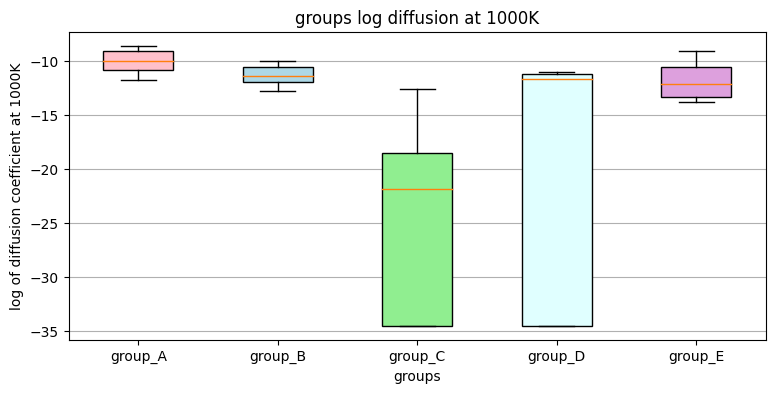

In [25]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

labels = ['group_A', 'group_B', 'group_C', 'group_D', 'group_E']
all_data = list()
for i, group in enumerate(['group_A', 'group_B', 'group_C', 'group_D', 'group_E']):
    data = data_slim_1000_K[data_slim_1000_K['target'] == group]
    print("Number of compounds at {} is {}".format(group, data['diffusion_coef'].shape[0]))
    all_data.append(np.log(data['diffusion_coef']))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('groups log diffusion at 1000K')

# notch shape box plot


# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'lightcyan', 'plum']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1]:
    ax.yaxis.grid(True)
    ax.set_xlabel('groups')
    ax.set_ylabel('log of diffusion coefficient at 1000K')


In [26]:

data_slim_1000_K.loc[data_slim_1000_K['stru_id'].isin([1008693, 39761, 421083]) == True, 'target'] = 'three_from_group_B'


Number of compounds at group_A is 6
Number of compounds at three_from_group_B is 3
Number of compounds at group_B is 16
Number of compounds at group_C is 70
Number of compounds at group_D is 5
Number of compounds at group_E is 21


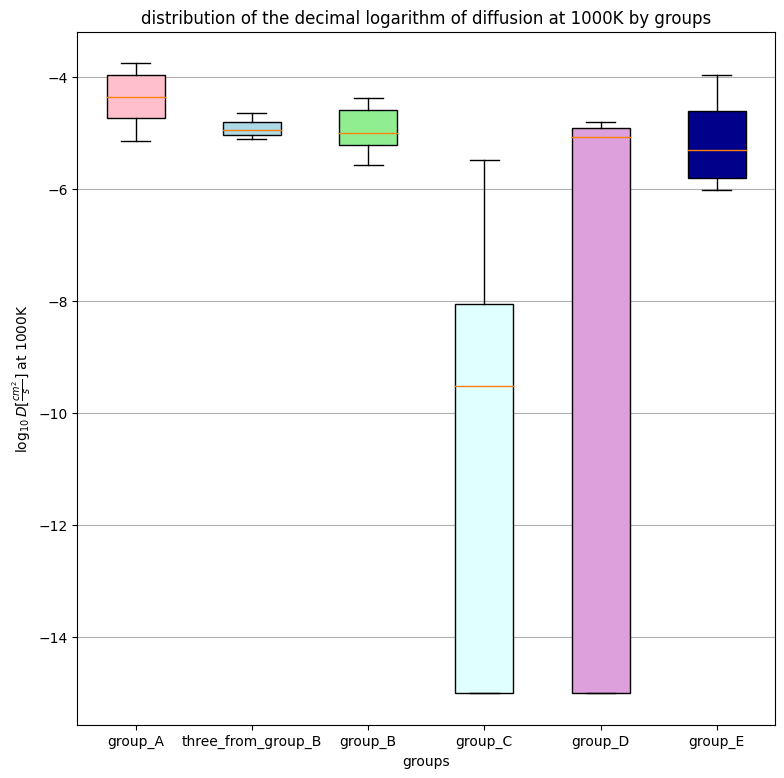

In [33]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))

labels = ['group_A', 'three_from_group_B', 'group_B', 'group_C', 'group_D', 'group_E']
all_data = list()
for i, group in enumerate(labels):
    data = data_slim_1000_K[data_slim_1000_K['target'] == group]
    print("Number of compounds at {} is {}".format(group, data['diffusion_coef'].shape[0]))
    all_data.append(np.log10(data['diffusion_coef']))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('distribution of the decimal logarithm of diffusion at 1000K by groups')

# notch shape box plot


# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'lightcyan', 'plum', 'darkblue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1]:
    ax.yaxis.grid(True)
    ax.set_xlabel('groups')
    ax.set_ylabel('$\log_{10}D[\\frac{cm^2}{s}]$ at 1000K')
